In [1]:
import numpy as np
import pandas
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In class we have been talking about the theoretical aspect of simple linear regression models. Today it's time to see how things work in reality. 

The following data is the number of enrollment students ($y$) vs days started the teaching ($x$). Your job is to help figure out the number of days it takes for your insturctor to scare away all your students. 


In [2]:
x = np.arange(7)+1
y = [84,94,100,70, 47, 42, 39]
data = pandas.DataFrame({'predictor': x, 'response': y})
data.head()

,predictor,response
0,1,84
1,2,94
2,3,100
3,4,70
4,5,47


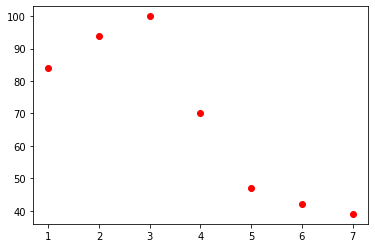

In [3]:
# scatter plot
plt.scatter(x, y,color='red')

Now it's time to fit a linear regression model!

statsmodels.api.OLS

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

In [4]:
model = sm.OLS(y, x).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.512
Model:                            OLS   Adj. R-squared (uncentered):              0.430
Method:                 Least Squares   F-statistic:                              6.283
Date:                Wed, 06 Oct 2021   Prob (F-statistic):                      0.0461
Time:                        20:36:49   Log-Likelihood:                         -37.361
No. Observations:                   7   AIC:                                      76.72
Df Residuals:                       6   BIC:                                      76.67
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


Do things look right? I.e. it seems like the instructor can keep her job!

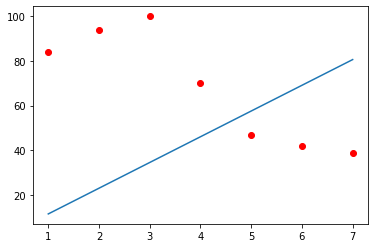

In [5]:
# scatter plot
plt.scatter(x, y,color='red')
b = model.params
plt.plot(x,b*x)

In fact, in Python, you have to hand-craft your ``design matrix'', meaning that you have to add in the slop!

In [6]:
x2 = statsmodels.tools.tools.add_constant(x)
model = sm.OLS(y, x2).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     17.44
Date:                Wed, 06 Oct 2021   Prob (F-statistic):            0.00868
Time:                        20:36:51   Log-Likelihood:                -26.823
No. Observations:                   7   AIC:                             57.65
Df Residuals:                       5   BIC:                             57.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.7143     11.167      9.825      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


Check again this time!

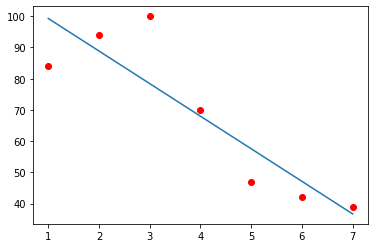

In [7]:
plt.scatter(x, y,color='red')
[b0,b1] = model.params
yhat = b0+x*b1
plt.plot(x,yhat)

Now, what is the expected days for your instructor to have 0 students?

In [8]:
b0/-b1

10.52054794520548

What is the expectation of the number of students on the 8th day? 
Can you make a prediction? What about a 95% confidence interval?

In [9]:
yhat = model.predict((1,8))
print(yhat)

[26.28571429]


In [10]:
yhat = model.get_prediction((1,8))
yhat.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,26.285714,11.166641,-2.419051,54.99048,-18.183517,70.754945


In order to argue with the secretary to keep her job, help your instructor to find reasons to keep her in the department. 

About $R^2$: the fraction of variability explained by the regression if the underlying model assumption is true.

$$
R^2 = \frac{SS_{\text{reg}}}{SS_{\text{total}}}= 1-\frac{RSS}{SS_{\text{total}}}.
$$

$R^2\in[0,1]$:   $\widehat{\beta}_1=0$ iff $R^2=0$; $e =0$ iff $R^2=1$.




Adjusted $R^2$: the fraction of variability explained by the regression if the underlying model assumption is true.

$$
R^2_{adj} =  1-\frac{RSS/(n-p)}{SS_{\text{total}}/(n-1)} = 1-\frac{RSS}{SS_{\text{total}}} \frac{n-1}{n-p} = 1-(1-R^2)\frac{n-1}{n-p} <R^2 .
$$


Relation of $R^2$ and $F$ statistics

Notice that 
$$
F = \frac{SS_{reg}/1}{RSS/(n-2)} = (n-2) \left(\frac{SS_{total}}{RSS} - 1\right) = \frac{(n-2)R^2}{1-R^2}
$$

In [11]:
model.fvalue - (7-2)*model.rsquared/(1- model.rsquared)

-3.552713678800501e-15

What about the relationship between Wald $T$ statistics and $F$ statistics?

They are the **same**!

Recall that
$$
F 
= \frac{SS_{reg}/1}{RSS/(n-2)} 
= \frac{\|\widehat\beta_0 - x\widehat\beta_1 - \widehat\beta_0 + \bar{x}\widehat\beta_1\mathbb{1}_n\|^2}{RSS/(n-2)}
= \frac{\widehat{\beta}_1^2 \|x - \bar{x}\mathbb{1}_n\|^2 }{R/(n-2)}
 = \frac{\widehat{\beta}_1^2}{se({\widehat\beta_1})^2}
 =T^2.
$$


In [12]:
model.fvalue - model.tvalues[1]**2

7.105427357601002e-15